### Install Ultralytics package

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 26.6 MB/s eta 0:00:00


In [ ]:
!pip install gdown

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

### Download dataset

In [ ]:
%cd /kaggle/working/
!gdown 18N3tesWa6EaMOC-ZRh6NB3-avC8nvfgx
!unzip yolo.zip

/kaggle/working
Downloading...
From (original): https://drive.google.com/uc?id=18N3tesWa6EaMOC-ZRh6NB3-avC8nvfgx
From (redirected): https://drive.google.com/uc?id=18N3tesWa6EaMOC-ZRh6NB3-avC8nvfgx&confirm=t&uuid=c98bf15b-c8e5-4e77-930d-cedae0cc7e38
To: /kaggle/working/yolo.zip
100%|████████████████████████████████████████| 184M/184M [00:04<00:00, 38.8MB/s]
Archive:  yolo.zip
   creating: yolo/
   creating: yolo/detect/
  inflating: yolo/detect/data.yaml   
   creating: yolo/detect/images/
   creating: yolo/detect/images/test/
  inflating: yolo/detect/images/test/IMG0000142.jpg  
  inflating: yolo/detect/images/test/IMG0000207.jpg  
  inflating: yolo/detect/images/test/IMG0000454.jpg  
  inflating: yolo/detect/images/test/IMG0000480.jpg  
  inflating: yolo/detect/images/test/IMG0000671.jpg  
  inflating: yolo/detect/images/test/IMG0000776.jpg  
  inflating: yolo/detect/images/test/IMG0000777.jpg  
  inflating: yolo/detect/images/test/IMG0000805.jpg  
  inflating: yolo/detect/images/test

## DETECT

### Training Yolov8m detection

In [ ]:
!wandb disabled
!yolo task=detect mode=train model=yolov8m.pt data= /kaggle/working/yolo/detect/data.yaml epochs=50 imgsz=640

W&B disabled.
100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 332MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/yolo/detect/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

### Validate model on val dataset

In [ ]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/last.pt' data=/kaggle/working/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/yolo/detect/labels/val.cache... 86 images, 0 backg
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         86        101      0.735      0.467      0.513      0.203
Speed: 2.6ms preprocess, 15.0ms inference, 0.0ms loss, 15.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data=/kaggle/working/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/yolo/detect/labels/val.cache... 86 images, 0 backg
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         86        101      0.696      0.453      0.537      0.223
Speed: 2.9ms preprocess, 16.0ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference on test data

In [ ]:
!yolo task=detect mode=predict save=True model='/kaggle/working/runs/detect/train/weights/best.pt' conf=0.25 source="/kaggle/working/yolo/detect/images/test"

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/58 /kaggle/working/yolo/detect/images/test/IMG0000142.jpg: 640x512 1 fractured, 62.7ms
image 2/58 /kaggle/working/yolo/detect/images/test/IMG0000207.jpg: 640x512 (no detections), 12.7ms
image 3/58 /kaggle/working/yolo/detect/images/test/IMG0000454.jpg: 640x544 (no detections), 61.4ms
image 4/58 /kaggle/working/yolo/detect/images/test/IMG0000480.jpg: 640x544 2 fractureds, 12.8ms
image 5/58 /kaggle/working/yolo/detect/images/test/IMG0000671.jpg: 640x544 (no detections), 12.8ms
image 6/58 /kaggle/working/yolo/detect/images/test/IMG0000776.jpg: 640x544 2 fractureds, 12.8ms
image 7/58 /kaggle/working/yolo/detect/images/test/IMG0000777.jpg: 640x544 2 fractureds, 12.7ms
image 8/58 /kaggle/working/yolo/detect/images/test/IMG0000805.jpg: 544x640 1 fractured, 58.3ms
image 9/58 /kaggle/working/yolo/detect/images/test

### Plot result on test dataset

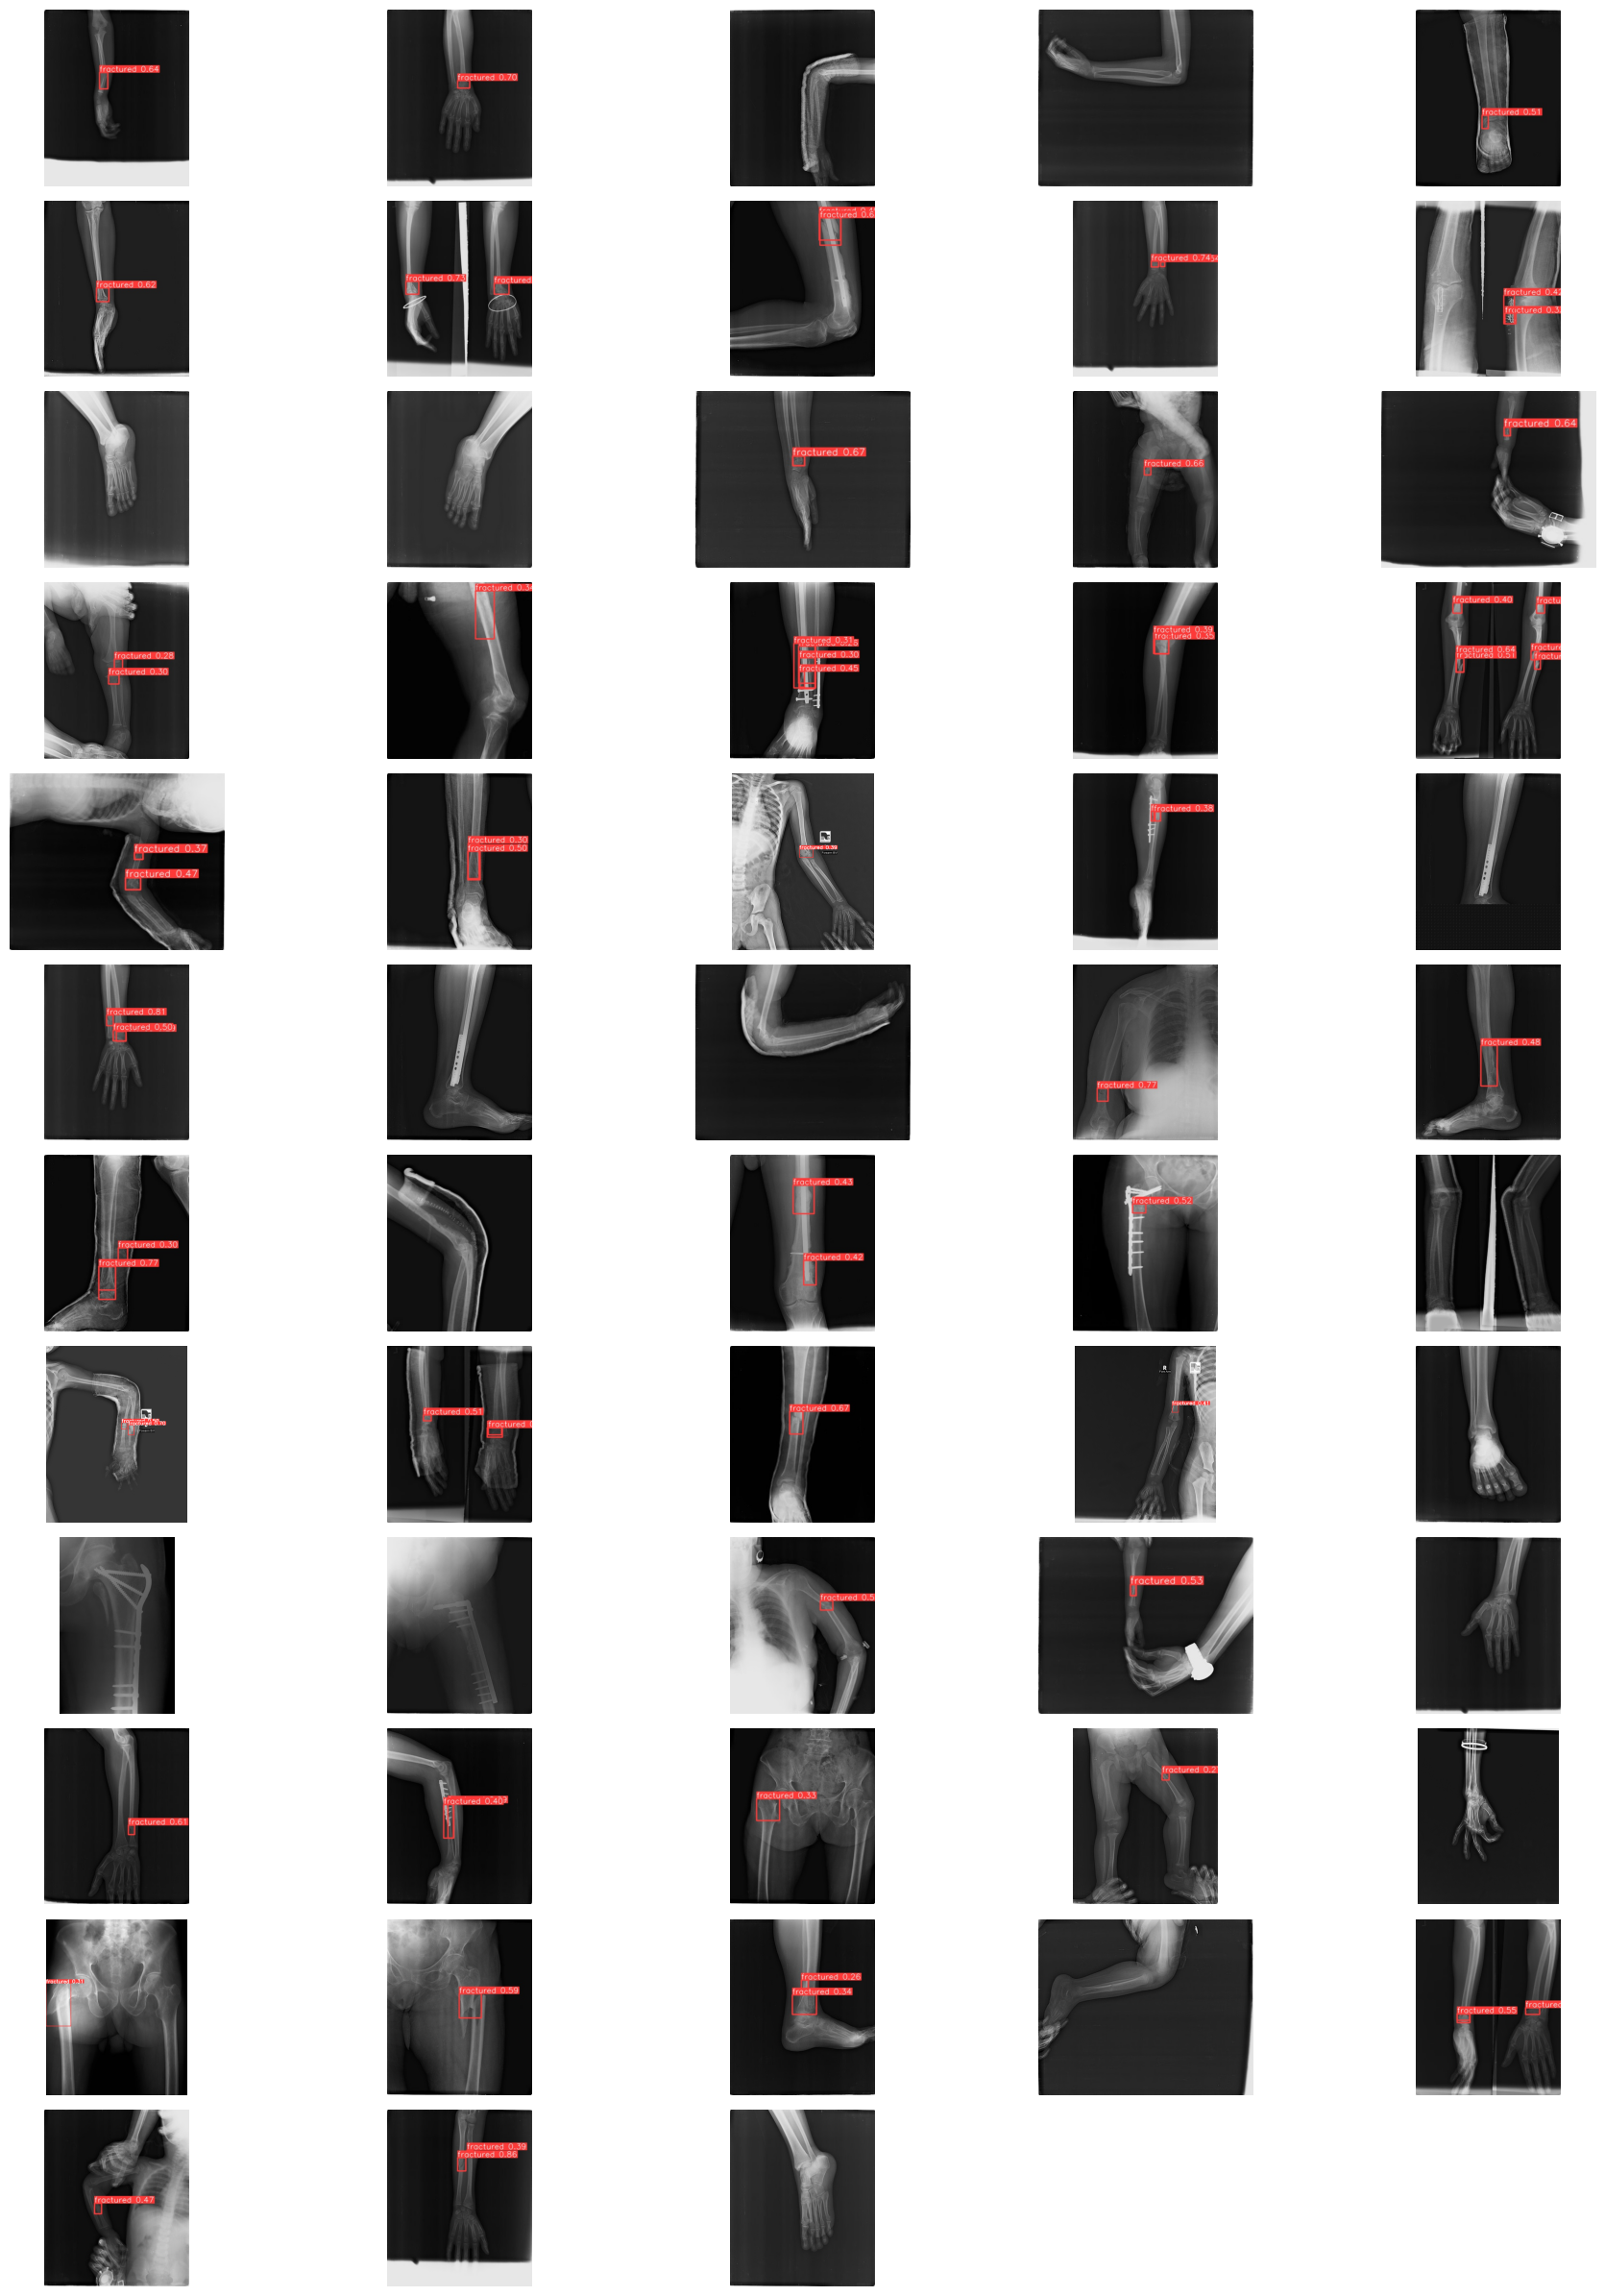

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

folder_path = '/kaggle/working/runs/detect/predict'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    # Turn off axis labels for a cleaner presentation
    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate on test dataset

In [ ]:
!yolo task=detect mode=val save=True model='/kaggle/working/runs/detect/train/weights/last.pt' data=/kaggle/working/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/yolo/detect/labels/test... 58 images, 0 background
val: New cache created: /kaggle/working/yolo/detect/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         58         73      0.727      0.548      0.565      0.207
Speed: 3.9ms preprocess, 22.3ms inference, 0.0ms loss, 16.3ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val save=True model='/kaggle/working/runs/detect/train/weights/best.pt' data=/kaggle/working/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/yolo/detect/labels/test.cache... 58 images, 0 back
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         58         73      0.796      0.466      0.551      0.213
Speed: 4.0ms preprocess, 24.4ms inference, 0.0ms loss, 15.3ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


## SEGMENT

### Training Yolov8m segmentation

In [ ]:
!yolo task=segment mode=train model=yolov8m-seg.pt data=/kaggle/working/yolo/segment/data.yaml epochs=50 imgsz=640

100%|███████████████████████████████████████| 52.4M/52.4M [00:00<00:00, 304MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/yolo/segment/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

### Validate on val dataset

In [ ]:
!yolo task=segment mode=val model='/kaggle/working/runs/segment/train/weights/last.pt' data=/kaggle/working/yolo/segment/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /kaggle/working/yolo/segment/labels/val.cache... 86 images, 0 back
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         86        101      0.659      0.498      0.498      0.205      0.795      0.416      0.464       0.17
Speed: 3.1ms preprocess, 14.0ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=segment mode=val model='/kaggle/working/runs/segment/train/weights/best.pt' data=/kaggle/working/yolo/segment/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /kaggle/working/yolo/segment/labels/val.cache... 86 images, 0 back
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         86        101      0.707      0.446      0.506      0.237      0.588      0.455      0.443      0.176
Speed: 2.5ms preprocess, 12.5ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/segment/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference on test dataset

In [ ]:
!yolo task=segment mode=predict  model='/kaggle/working/runs/segment/train/weights/best.pt' conf=0.25 source="/kaggle/working/yolo/segment/images/test"

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs

image 1/58 /kaggle/working/yolo/segment/images/test/IMG0000142.jpg: 640x512 1 fractured, 89.8ms
image 2/58 /kaggle/working/yolo/segment/images/test/IMG0000207.jpg: 640x512 3 fractureds, 16.4ms
image 3/58 /kaggle/working/yolo/segment/images/test/IMG0000454.jpg: 640x544 (no detections), 85.1ms
image 4/58 /kaggle/working/yolo/segment/images/test/IMG0000480.jpg: 640x544 2 fractureds, 16.8ms
image 5/58 /kaggle/working/yolo/segment/images/test/IMG0000671.jpg: 640x544 (no detections), 16.8ms
image 6/58 /kaggle/working/yolo/segment/images/test/IMG0000776.jpg: 640x544 2 fractureds, 16.9ms
image 7/58 /kaggle/working/yolo/segment/images/test/IMG0000777.jpg: 640x544 5 fractureds, 16.4ms
image 8/58 /kaggle/working/yolo/segment/images/test/IMG0000805.jpg: 544x640 1 fractured, 85.7ms
image 9/58 /kaggle/working/yolo/segmen

### Plot result on test dataset

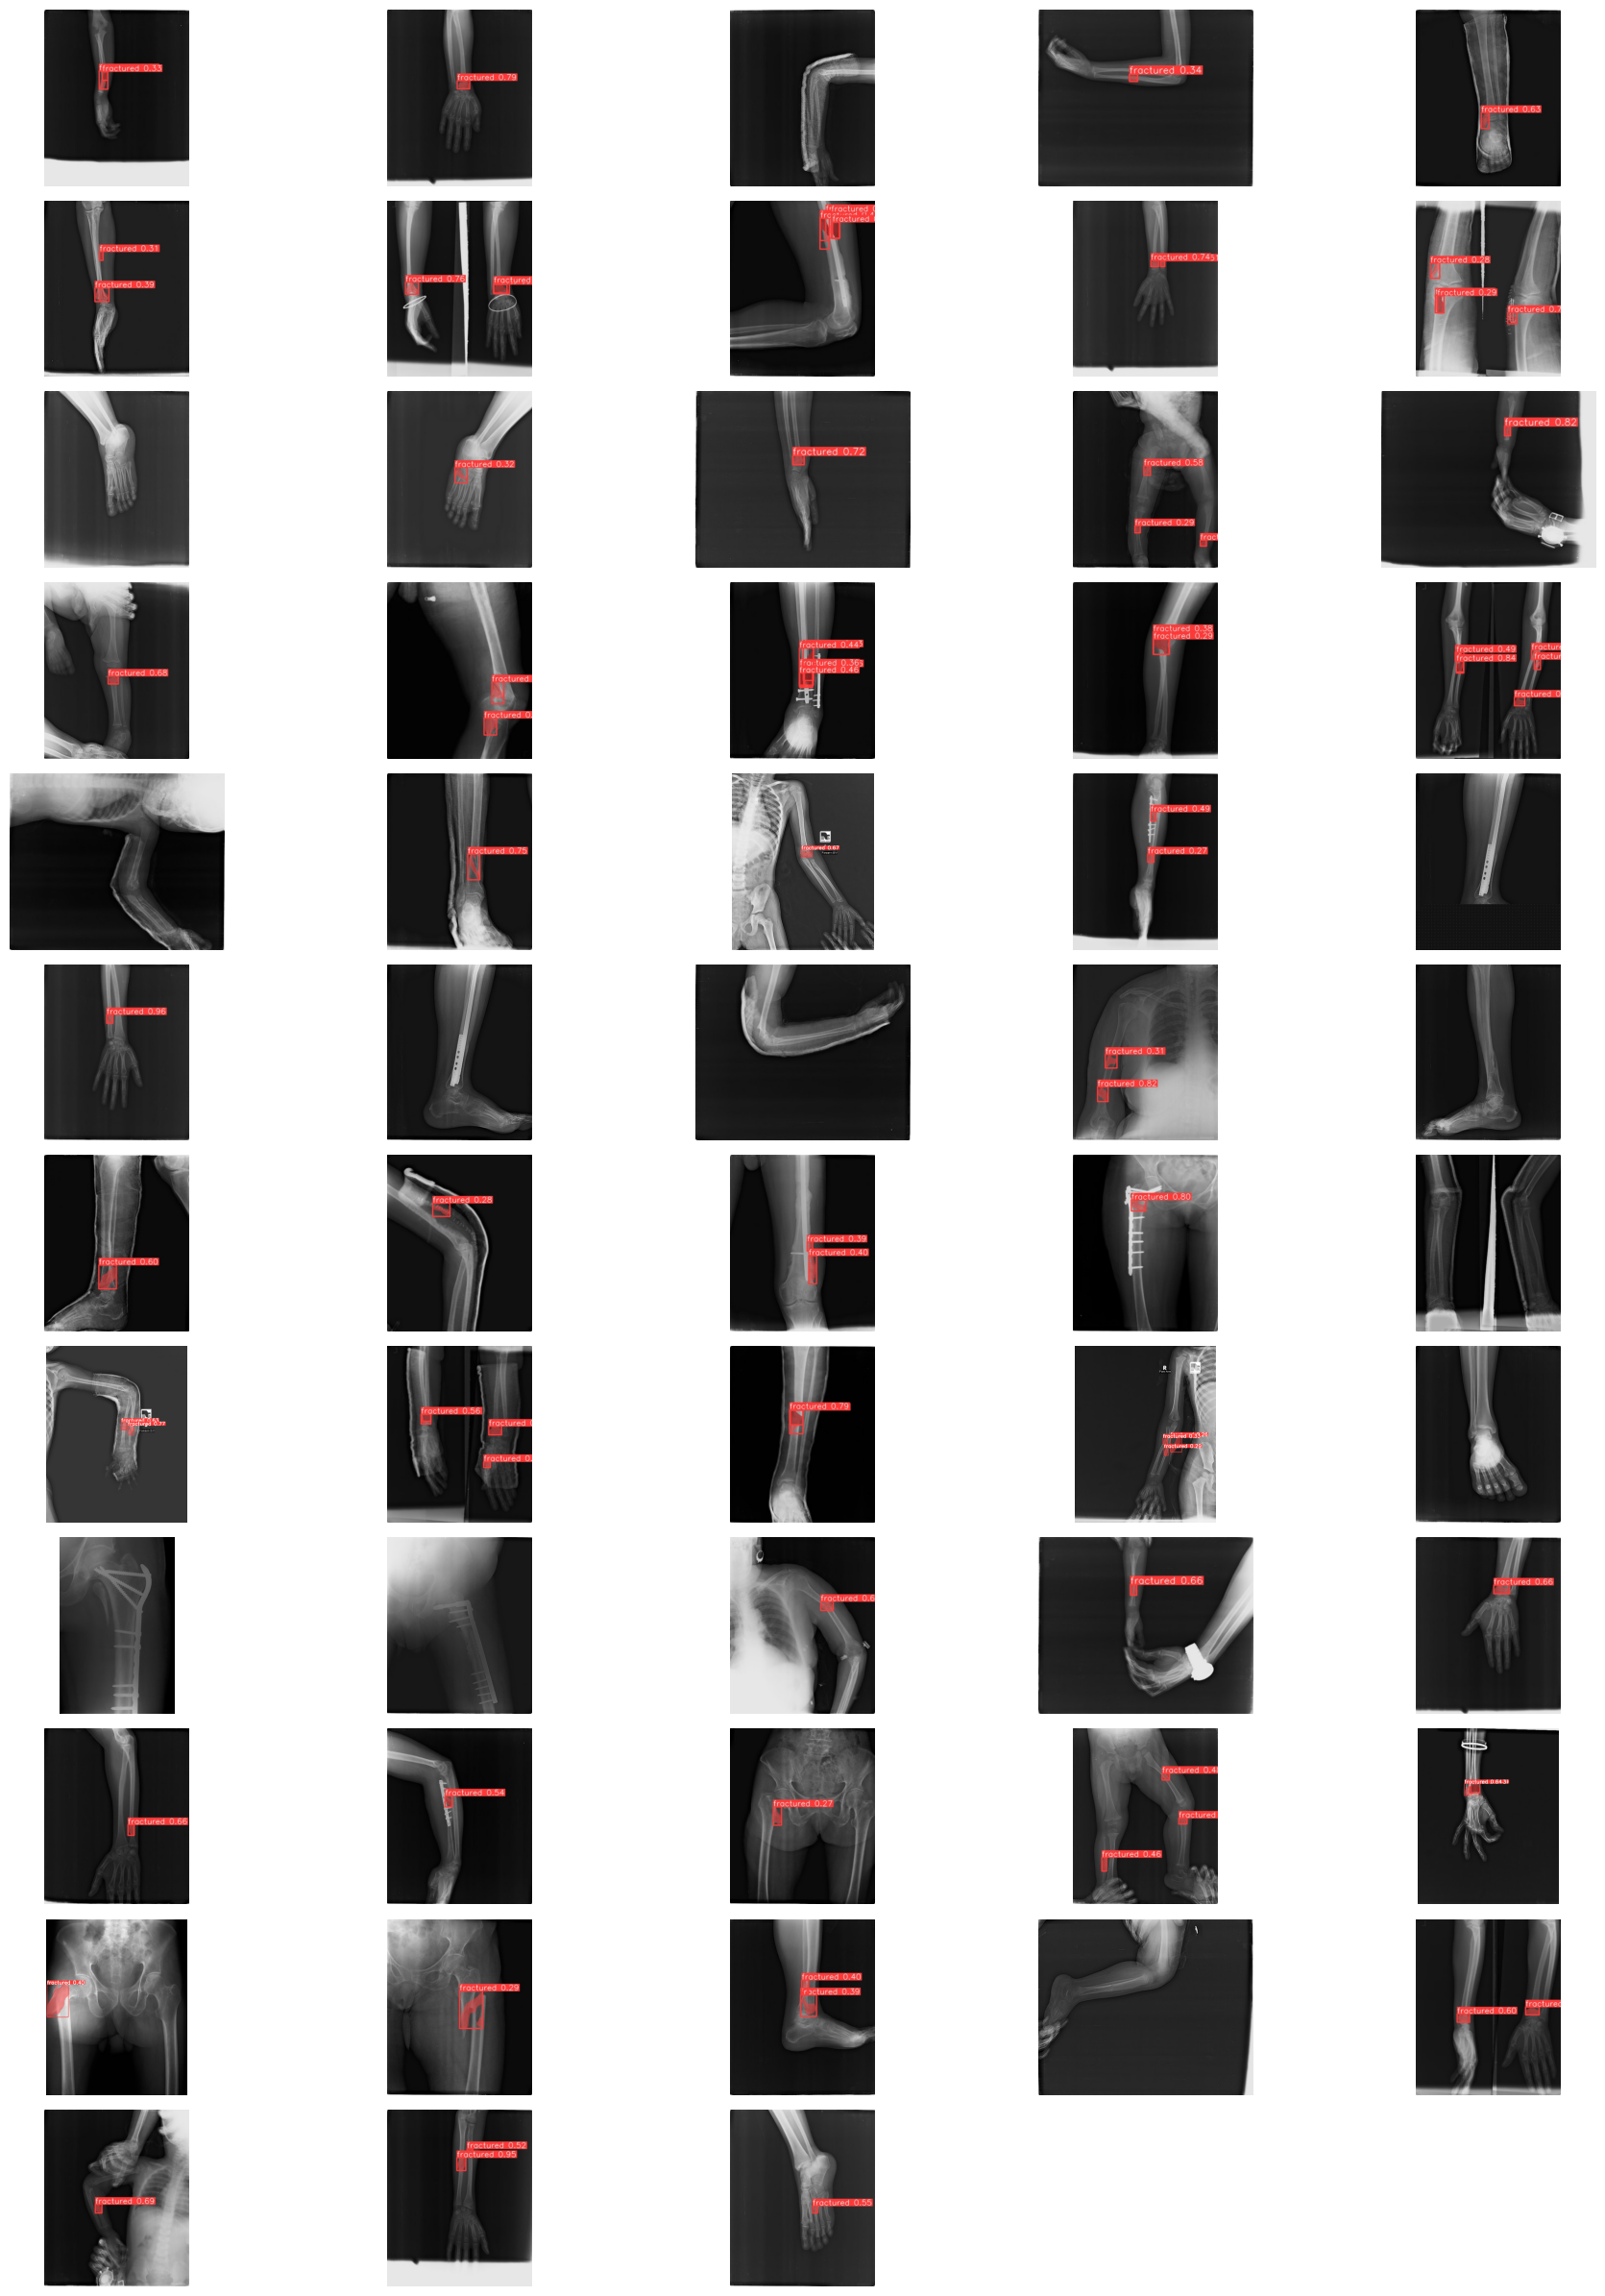

In [ ]:
folder_path = '/kaggle/working/runs/segment/predict'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate on test dataset

In [ ]:
!yolo task=segment mode=val model='/kaggle/working/runs/segment/train/weights/last.pt' data=/kaggle/working/yolo/segment/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /kaggle/working/yolo/segment/labels/test... 58 images, 0 backgroun
val: New cache created: /kaggle/working/yolo/segment/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         58         73      0.795      0.425      0.532      0.214      0.784      0.452      0.566      0.183
Speed: 4.2ms preprocess, 18.1ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/segment/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=segment mode=val model='/kaggle/working/runs/segment/train/weights/best.pt' data=/kaggle/working/yolo/segment/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /kaggle/working/yolo/segment/labels/test.cache... 58 images, 0 bac
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         58         73      0.529       0.57      0.548      0.219      0.589      0.479      0.521      0.189
Speed: 2.6ms preprocess, 17.5ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to runs/segment/val4
💡 Learn more at https://docs.ultralytics.com/modes/val
